# [1] Moving Average Convergence Divergence (MACD) for Forex Trading

* MACD is the most commonly used momentum indicator to determine an asset's uptrend or downtrend. (Though RSI is a more reliable momentum indicator as compared to MACD. If you want to check the work on RSI indicator, please visit [this kernel](https://www.kaggle.com/code/chandrimad31/forex-trading-momentum-analysis-rsi-divergence)).
* For MACD, if the 2 moving averages are moving closer together it is said to be *converging* and if they are moving away from each other it is said to be *diverging*.
* MACD triggers technical signals when it crosses above (to buy) or below (to sell) its signal line. The speed of crossovers can also be taken as a signal of the market to know if the asset is overbought or oversold. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# import data
df = pd.read_csv('../input/eurusd-forex-trading-daily-data-20032021/EURUSD_Candlestick_1_D_ASK_05.05.2003-30.06.2021.csv')
df.columns=['date_time', 'open', 'high', 'low', 'close', 'volume']
df=df[df['volume']!=0] #discard volume zero data points
df.reset_index(drop=True, inplace=True)
df.isna().sum()
df.tail() # printing tail just to check how many rows are present

,date_time,open,high,low,close,volume
4729,24.06.2021 00:00:00.000 GMT+0300,1.19267,1.19565,1.19178,1.19322,85152.21000
4730,25.06.2021 00:00:00.000 GMT+0300,1.19322,1.19754,1.19264,1.19392,77837.64500
4731,28.06.2021 00:00:00.000 GMT+0300,1.19380,1.19447,1.19025,1.19260,85154.26000
4732,29.06.2021 00:00:00.000 GMT+0300,1.19297,1.19334,1.18779,1.18973,98898.57000
4733,30.06.2021 00:00:00.000 GMT+0300,1.18973,1.19092,1.18452,1.18589,4301.30191


In [3]:
df = df.set_index(['date_time']) 
df.head()

,open,high,low,close,volume
date_time,,,,,
05.05.2003 00:00:00.000 GMT+0300,1.12354,1.13019,1.12030,1.12804,1053162.797
06.05.2003 00:00:00.000 GMT+0300,1.12798,1.14510,1.12738,1.14368,1061122.699
07.05.2003 00:00:00.000 GMT+0300,1.14367,1.14448,1.13275,1.13677,1056796.590
08.05.2003 00:00:00.000 GMT+0300,1.13675,1.15092,1.13026,1.15026,1058908.699
09.05.2003 00:00:00.000 GMT+0300,1.15002,1.15376,1.14362,1.14907,1063989.000


In [4]:
# There is 1 day of missing values. Using linear interpolate to fill that value
df = df.interpolate()

## Visualize Data for a Short Horizon

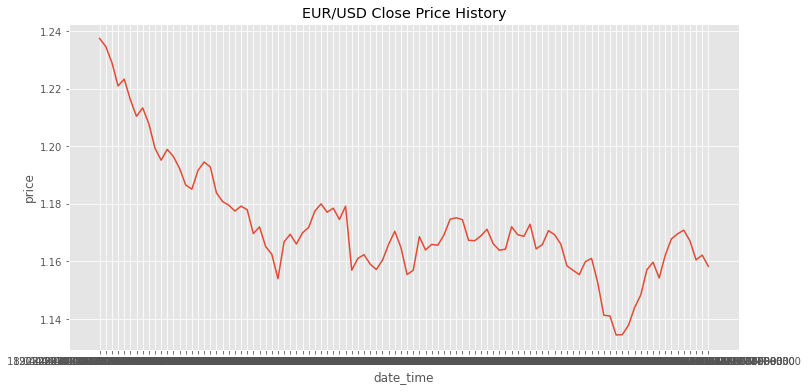

In [5]:
dfpl = df[3900:4000] #choosing a slice of 100 datapoints
plt.figure(figsize=(12, 6))
plt.plot(dfpl['close'], label='close')
plt.title('EUR/USD Close Price History')
plt.xlabel('date_time')
plt.ylabel('price')
plt.show()

## Visualize Data for a Long Horizon

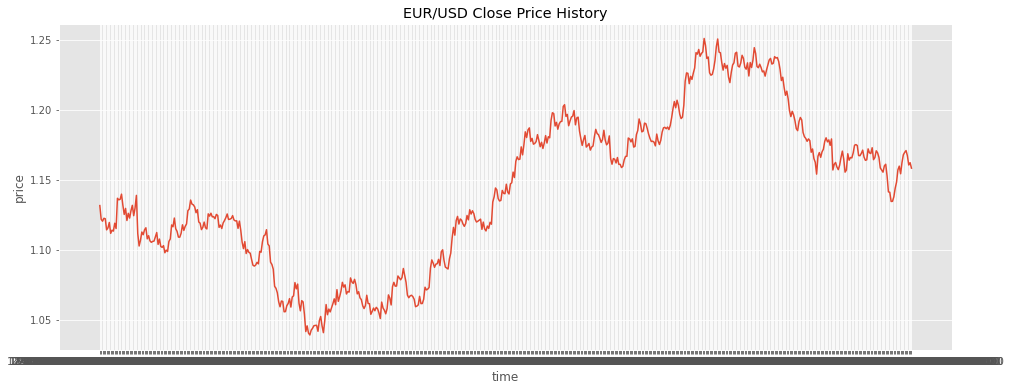

In [6]:
dfpl = df[3400:4000] # choosing a slice of 600 datapoints
plt.figure(figsize=(16, 6))
plt.plot(dfpl['close'], label='close')
plt.title('EUR/USD Close Price History')
plt.xlabel('time')
plt.ylabel('price')
plt.show()

## Calculate the MACD and Signal lines

For divergence calculation, taking a long horizon is better. Hence choosing the slice of dataframe having 600 datapoints

In [7]:
dfpl = df[3400:4000] # choosing the long horizon i.e. the slice having 600 datapoints

# Calculate the short term exponetial moving average (EMA) - 12 periods
ShortEMA = dfpl.close.ewm(span=12, adjust=False).mean()
# Calculate the long term exponetial moving average (EMA) - 26 periods
LongEMA = dfpl.close.ewm(span=26, adjust = False).mean()
# Calculate the MACD line
MACD = ShortEMA - LongEMA
# Calculate the signal line
signal = MACD.ewm(span=9, adjust=False).mean()

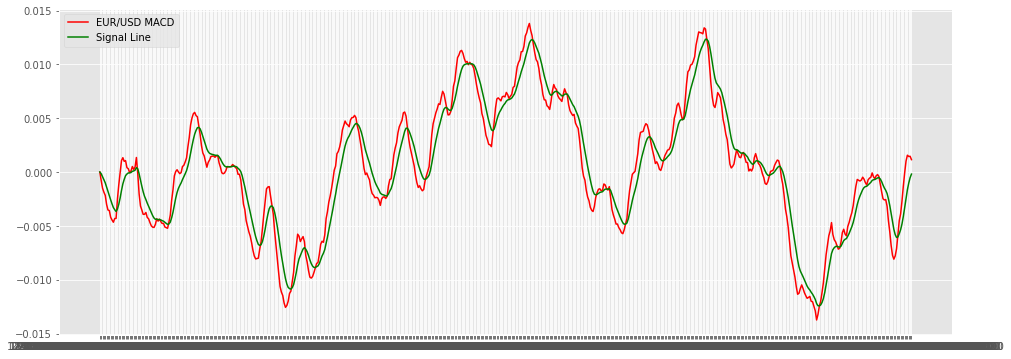

In [8]:
# plotting chart
plt.figure(figsize=(16, 6))
plt.plot(dfpl.index, MACD, label = 'EUR/USD MACD', color = 'red')
plt.plot(dfpl.index, signal, label = 'Signal Line', color = 'green')
plt.legend(loc='upper left')
plt.show()

In [9]:
dfpl['MACD'] = MACD
dfpl['Signal'] = signal
dfpl.head()

,open,high,low,close,volume,MACD,Signal
date_time,,,,,,,
17.05.2016 00:00:00.000 GMT+0300,1.13216,1.13490,1.13022,1.13150,197685.7896,0.000000,0.000000
18.05.2016 00:00:00.000 GMT+0300,1.13150,1.13165,1.12144,1.12167,254514.9019,-0.000784,-0.000157
19.05.2016 00:00:00.000 GMT+0300,1.12167,1.12301,1.11802,1.12032,264691.8923,-0.001497,-0.000425
20.05.2016 00:00:00.000 GMT+0300,1.12034,1.12381,1.11966,1.12242,180147.1190,-0.001871,-0.000714
23.05.2016 00:00:00.000 GMT+0300,1.12100,1.12432,1.11878,1.12212,194025.2910,-0.002167,-0.001005


In [10]:
# Create a function - when to buy and sell
def buy_sell(signal):
    Buy = []
    Sell = []
    flag = -1 # Tells us if the price continues to rise or decreases - flag changes when the two lines cross again

    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal'][i]: # MACD has crossed the signal line
            Sell.append(np.nan)
            if flag != 1: 
                Buy.append(signal['close'][i])
                flag = 1 # We have been here
            else:
                Buy.append(np.nan)
        
        elif signal['MACD'][i] < signal['Signal'][i]: # Signal line has crossed the MACD line
            Buy.append(np.nan)
            if flag != 0: 
                Sell.append(signal['close'][i])
                flag = 0 
            else:
                Sell.append(np.nan)
        else:
            Sell.append(np.nan)
            Buy.append(np.nan)
    
    return (Buy, Sell)

In [11]:
# Create buy and sell columns in the working slice of the df
a = buy_sell(dfpl)
dfpl['Buy_Signal_Price']= a[0]
dfpl['Sell_Signal_Price'] = a[1]
dfpl.head()

,open,high,low,close,volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
date_time,,,,,,,,,
17.05.2016 00:00:00.000 GMT+0300,1.13216,1.13490,1.13022,1.13150,197685.7896,0.000000,0.000000,NaN,NaN
18.05.2016 00:00:00.000 GMT+0300,1.13150,1.13165,1.12144,1.12167,254514.9019,-0.000784,-0.000157,NaN,1.12167
19.05.2016 00:00:00.000 GMT+0300,1.12167,1.12301,1.11802,1.12032,264691.8923,-0.001497,-0.000425,NaN,NaN
20.05.2016 00:00:00.000 GMT+0300,1.12034,1.12381,1.11966,1.12242,180147.1190,-0.001871,-0.000714,NaN,NaN
23.05.2016 00:00:00.000 GMT+0300,1.12100,1.12432,1.11878,1.12212,194025.2910,-0.002167,-0.001005,NaN,NaN


## Visualize Buy and Sell Signals

We will now spot out the buying and selling signals for the horizon containing 600 datapoints we've chosen.

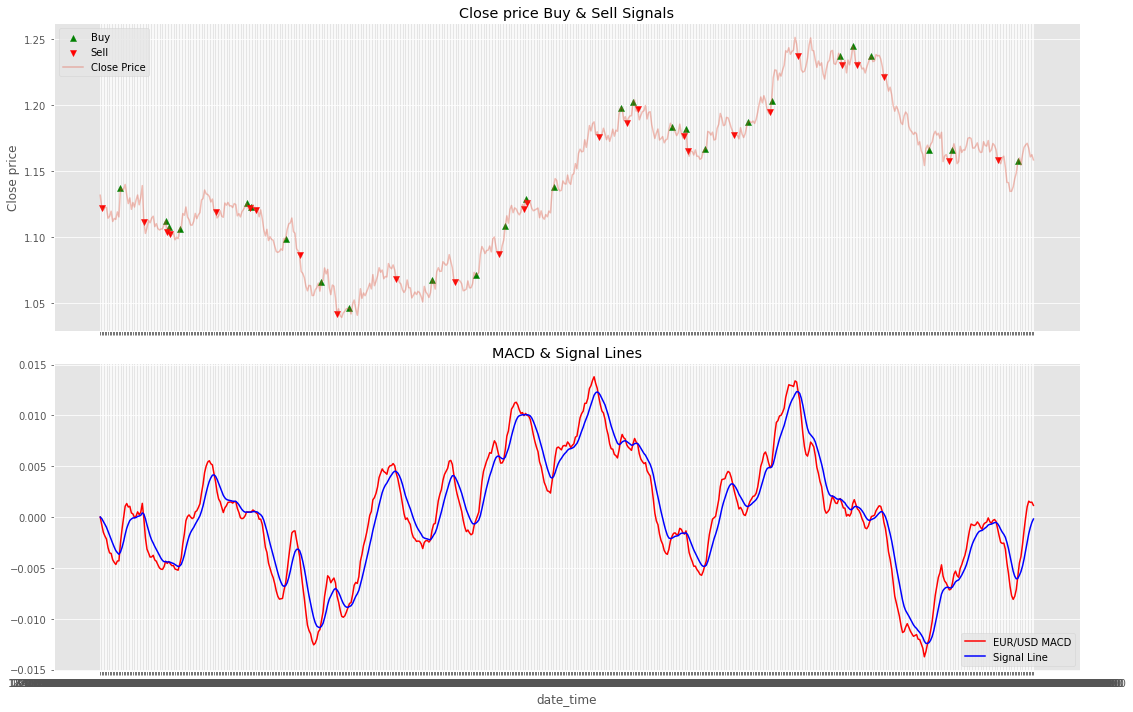

In [12]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(16, 10))

ax1.scatter(dfpl.index, dfpl['Buy_Signal_Price'], color='green', label='Buy', marker = '^', alpha =1)
ax1.scatter(dfpl.index, dfpl['Sell_Signal_Price'], color='red', label='Sell', marker = 'v', alpha =1)
ax1.plot(dfpl['close'], label = 'Close Price', alpha = 0.35)
ax1.set_title('Close price Buy & Sell Signals')
ax1.set_ylabel('Close price')
ax1.legend(loc='upper left')

ax2.set_title('MACD & Signal Lines')
ax2.plot(dfpl.index, MACD, label = 'EUR/USD MACD', color = 'red')
ax2.plot(dfpl.index, signal, label = 'Signal Line', color = 'blue')
ax2.set_xlabel('date_time')
ax2.legend(loc='lower right')

plt.tight_layout()
plt.show()

In [13]:
buy_signal_entries = dfpl[dfpl.Buy_Signal_Price.notna()].copy()
buy_signal_entries

,open,high,low,close,volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
date_time,,,,,,,,,
03.06.2016 00:00:00.000 GMT+0300,1.11509,1.13739,1.11370,1.13672,2.507651e+05,-0.002519,-0.003435,1.13672,NaN
14.07.2016 00:00:00.000 GMT+0300,1.10916,1.11650,1.10886,1.11224,2.437912e+05,-0.004343,-0.004381,1.11224,NaN
18.07.2016 00:00:00.000 GMT+0300,1.10534,1.10844,1.10377,1.10756,1.947174e+05,-0.004376,-0.004409,1.10756,NaN
27.07.2016 00:00:00.000 GMT+0300,1.09871,1.10651,1.09619,1.10588,9.313840e+05,-0.004644,-0.004819,1.10588,NaN
26.09.2016 00:00:00.000 GMT+0300,1.12306,1.12794,1.12213,1.12551,1.230320e+06,0.000509,0.000488,1.12551,NaN
29.09.2016 00:00:00.000 GMT+0300,1.12180,1.12499,1.11970,1.12229,1.342987e+06,0.000514,0.000492,1.12229,NaN
30.10.2016 23:00:00.000 GMT+0200,1.09939,1.09939,1.09361,1.09814,1.848573e+05,-0.006486,-0.006748,1.09814,NaN
01.12.2016 00:00:00.000 GMT+0200,1.05890,1.06689,1.05847,1.06612,2.786184e+05,-0.010198,-0.010739,1.06612,NaN
27.12.2016 00:00:00.000 GMT+0200,1.04587,1.04635,1.04327,1.04590,1.134984e+05,-0.008496,-0.008796,1.04590,NaN


In [14]:
#Export the buy signal results
buy_signal_entries.to_csv('MACD_buy_signal_results.csv', index=False)

In [15]:
sell_signal_entries = dfpl[dfpl.Sell_Signal_Price.notna()].copy()
sell_signal_entries

,open,high,low,close,volume,MACD,Signal,Buy_Signal_Price,Sell_Signal_Price
date_time,,,,,,,,,
18.05.2016 00:00:00.000 GMT+0300,1.13150,1.13165,1.12144,1.12167,2.545149e+05,-0.000784,-0.000157,NaN,1.12167
24.06.2016 00:00:00.000 GMT+0300,1.13880,1.14290,1.09118,1.11141,3.846628e+05,-0.000153,0.000296,NaN,1.11141
15.07.2016 00:00:00.000 GMT+0300,1.11224,1.11490,1.10253,1.10374,2.302876e+05,-0.004561,-0.004417,NaN,1.10374
19.07.2016 00:00:00.000 GMT+0300,1.10756,1.10807,1.10001,1.10227,1.969069e+05,-0.004603,-0.004448,NaN,1.10227
29.08.2016 00:00:00.000 GMT+0300,1.11840,1.12080,1.11581,1.11895,8.445456e+05,0.003499,0.004019,NaN,1.11895
28.09.2016 00:00:00.000 GMT+0300,1.12170,1.12371,1.11821,1.12177,1.440550e+06,0.000483,0.000487,NaN,1.12177
04.10.2016 00:00:00.000 GMT+0300,1.12126,1.12392,1.11381,1.12054,1.401005e+06,0.000434,0.000522,NaN,1.12054
11.11.2016 00:00:00.000 GMT+0200,1.08937,1.09236,1.08306,1.08602,2.927802e+05,-0.003893,-0.003301,NaN,1.08602
15.12.2016 00:00:00.000 GMT+0200,1.05370,1.05397,1.03667,1.04143,2.961366e+05,-0.007763,-0.007166,NaN,1.04143


In [16]:
#Export the sell signal results
sell_signal_entries.to_csv('MACD_sell_signal_results.csv', index=False)

# [2] Bollinger Bands for Forex Trading

Bollinger Bands are also a tool used to determine overbought and oversold conditions. But using only these bands to trade is a risky strategy, because it focuses on price and volatility, ignoring a lot of other relevant information.

Bollinger Bands are envelopes plotted at a standard deviation (STD) level above and below a simple moving average (SMA) of the price. Since the distance of the bands is based on standard deviation, they adjust to volatility swing of the underlying price. These Bands use 2 main parameters: Period (we've taken a window of 20) and Standard Deviation (STD).

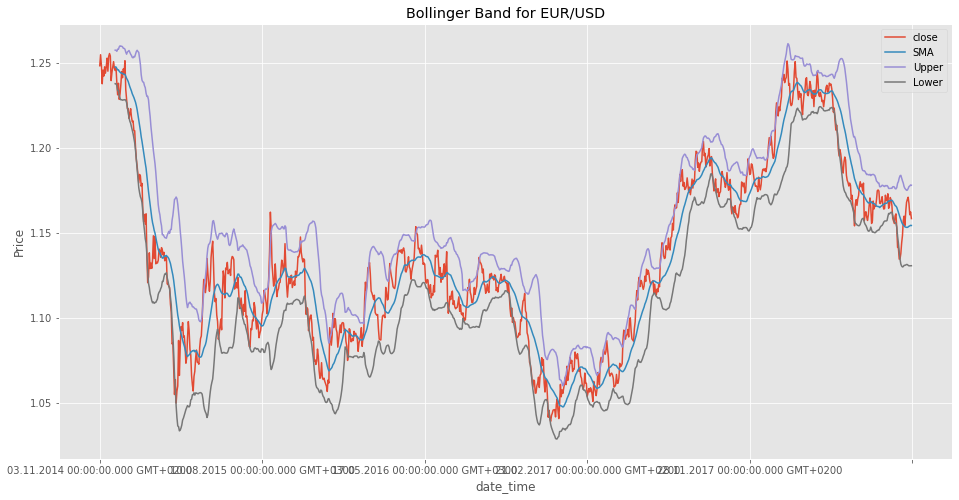

In [17]:
dfpl = df[3000:4000] # choosing a slice of 1000 datapoints

period = 20 #say window is 20
# simple moving average(SMA)
dfpl['SMA'] = dfpl['close'].rolling(window=period).mean()
# standard deviation
dfpl['STD'] = dfpl['close'].rolling(window=period).std()
# Upper Bollinger Band
dfpl['Upper'] = dfpl['SMA'] + (dfpl['STD'] * 2)
# Lower Bollinger Band
dfpl['Lower'] = dfpl['SMA'] - (dfpl['STD'] * 2)
column_list = ['close', 'SMA', 'Upper', 'Lower']

# Plotting
dfpl[column_list].plot(figsize=(16, 8))
plt.title('Bollinger Band for EUR/USD')
plt.ylabel('Price')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

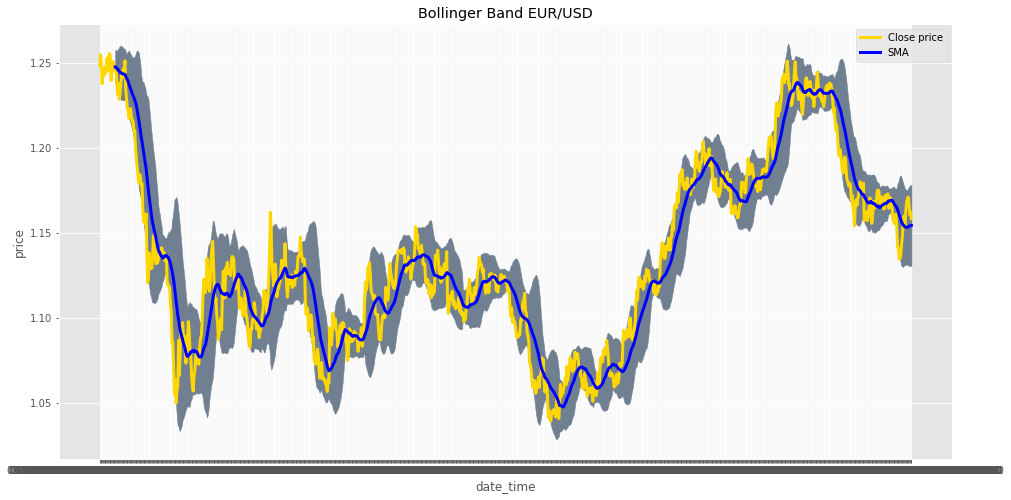

In [18]:
# Plot and shade the area between the two Bollinger bands
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,1,1)
x_axis = dfpl.index
ax.fill_between(x_axis, dfpl['Upper'], dfpl['Lower'], color= 'slategrey')
# Plot the closing price and moving average 
ax.plot(x_axis, dfpl['close'], color='gold', lw=3, label='Close price')
ax.plot(x_axis, dfpl['SMA'], color='blue', lw=3, label='SMA')
ax.set_title('Bollinger Band EUR/USD')
ax.set_xlabel('date_time')
ax.set_ylabel('price')
ax.ticklabel_format(style='plain', axis='y')
ax.legend()
plt.show()

In [19]:
# Get the buy and sell signals
new_dfpl = dfpl[period-1:]
new_dfpl

,open,high,low,close,volume,SMA,STD,Upper,Lower
date_time,,,,,,,,,
28.11.2014 00:00:00.000 GMT+0200,1.24676,1.24905,1.24267,1.24543,142910.3915,1.247535,0.004928,1.257390,1.237680
01.12.2014 00:00:00.000 GMT+0200,1.24640,1.25068,1.24196,1.24702,188482.7418,1.247475,0.004926,1.257328,1.237623
02.12.2014 00:00:00.000 GMT+0200,1.24703,1.24764,1.23770,1.23834,164404.5897,1.246659,0.005022,1.256703,1.236614
03.12.2014 00:00:00.000 GMT+0200,1.23835,1.23908,1.23015,1.23111,175128.7888,1.245783,0.006078,1.257940,1.233627
04.12.2014 00:00:00.000 GMT+0200,1.23111,1.24565,1.22808,1.23790,197770.1615,1.245798,0.006058,1.257914,1.233682
...,...,...,...,...,...,...,...,...,...
29.08.2018 00:00:00.000 GMT+0300,1.16957,1.17102,1.16523,1.17085,237137.2095,1.153367,0.011290,1.175947,1.130787
30.08.2018 00:00:00.000 GMT+0300,1.17085,1.17185,1.16419,1.16713,236570.7804,1.153802,0.011657,1.177116,1.130488
31.08.2018 00:00:00.000 GMT+0300,1.16716,1.16904,1.15848,1.16054,248778.1611,1.153984,0.011736,1.177455,1.130512


In [20]:
# function to get the buy & sell singnals

def get_signal(data):

    buy_signal = []
    sell_signal = []

    for i in range(len(data['close'])):
        if data['close'][i] > data['Upper'][i]: # Check to see if the Close is greater than Upper -> sell
            sell_signal.append(data['close'][i])
            buy_signal.append(np.nan)
        elif data['close'][i] < data['Lower'][i]: # Check to see if the Close is lower than Lower -> buy
            buy_signal.append(data['close'][i])
            sell_signal.append(np.nan)
        else:
            buy_signal.append(np.nan)
            sell_signal.append(np.nan)
    
    return (buy_signal, sell_signal)

In [21]:
# Create columns with the buy and sell signals

new_dfpl['Buy'] = get_signal(new_dfpl)[0]
new_dfpl['Sell'] = get_signal(new_dfpl)[1]

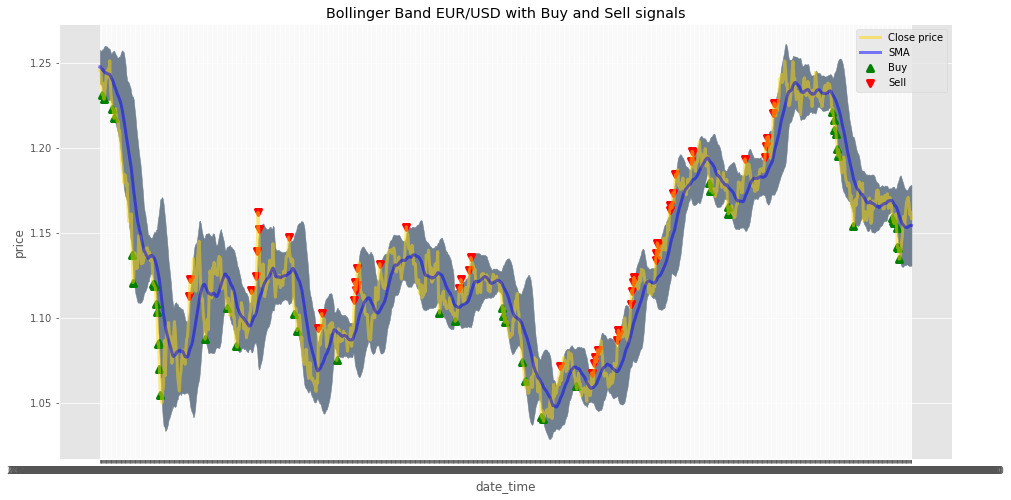

In [22]:
# Plot the buy and sell signals

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1,1,1)
x_axis = new_dfpl.index
ax.fill_between(x_axis, new_dfpl['Upper'], new_dfpl['Lower'], color= 'slategrey')
ax.plot(x_axis, new_dfpl['close'], color='gold', lw=3, label='Close price', alpha=0.5)
ax.plot(x_axis, new_dfpl['SMA'], color='blue', lw=3, label='SMA', alpha=0.5)
ax.scatter(x_axis, new_dfpl['Buy'], lw=3, color='green', label='Buy', marker='^', alpha=1)
ax.scatter(x_axis, new_dfpl['Sell'], lw=3, color='red', label='Sell', marker='v', alpha=1)
ax.set_title('Bollinger Band EUR/USD with Buy and Sell signals')
ax.set_xlabel('date_time')
ax.set_ylabel('price')
ax.ticklabel_format(style='plain', axis='y')
ax.legend()
plt.show()

In [23]:
buy_signal_entries = new_dfpl[new_dfpl.Buy.notna()].copy()

In [24]:
#Export the buy signal results
buy_signal_entries.to_csv('Bollinger_buy_signal_results.csv', index=False)

In [25]:
sell_signal_entries = new_dfpl[new_dfpl.Sell.notna()].copy()

In [26]:
#Export the sell signal results
sell_signal_entries.to_csv('Bollinger_sell_signal_results.csv', index=False)

# Acknowledgement :
I learnt the entire methodology and the code for functions implementation from [Code Trading Cafe](https://www.youtube.com/c/CodeTradingCafe/about)